In [42]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
#For machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [2]:
# Import dataset
data = pd.read_csv("imdb_top_1000.csv")
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


##### Data Description:
* Poster_Link = Link of the poster that imdb using
* Series_Title = Name of the movie
* Released_Year = Year at which that movie released
* Certificate = Certificate earned by that movie
* Runtime = Total runtime of the movie
* Genre = Genre of the movie
* IMDB_Rating = Rating of the movie given by public
* Overview = mini story/ summary
* Meta_score = Given by professional reviewers
* Director = Name of the Director
* Star1,Star2,Star3,Star4 = Name of the Stars
* No_of_votes = Total number of votes
* Gross = Money earned by that movie

### Step 1: Cleaning
Based on the Data Description, Poster_Link and Overview is unnecessary. Therefore, we will drop it.

In [4]:
data_clean = data.drop(columns=['Poster_Link', 'Overview'])

In [5]:
data_clean.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

We can observe that there are missing values. Therefore, we will drop all rows with no information regarding Gross income as we are looking for successful movies. However, we will keep those rows that have no Metascore and Certificate as it is still relevant. 

In [6]:
data_clean['Gross'] = data_clean['Gross'].str.replace(',', '')
data_clean['Gross'] = data_clean['Gross'].replace(np.nan, 0)
data_clean['Gross'] = data_clean['Gross'].astype(int)
data_clean.drop(data_clean[(data_clean['Gross'] == 0)].index, inplace = True)

In [7]:
data_clean.isna().sum()

Series_Title      0
Released_Year     0
Certificate      46
Runtime           0
Genre             0
IMDB_Rating       0
Meta_score       81
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
dtype: int64

In [8]:
#Check for duplicates.

data_clean.loc[data_clean.duplicated(subset=['Series_Title'])]

# No duplicates found.

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [9]:
# Genre contains up to 3 genre names, thus we will split it.
data_clean[['Genre1','Genre2','Genre3']] = data_clean['Genre'].str.split(pat=',',expand=True)
data_clean = data_clean.drop(columns=['Genre'])
data_clean.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross', 'Genre1', 'Genre2', 'Genre3'],
      dtype='object')

### Step 2: Exploratory Analysis

In [10]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   831 non-null    object 
 1   Released_Year  831 non-null    object 
 2   Certificate    785 non-null    object 
 3   Runtime        831 non-null    object 
 4   IMDB_Rating    831 non-null    float64
 5   Meta_score     750 non-null    float64
 6   Director       831 non-null    object 
 7   Star1          831 non-null    object 
 8   Star2          831 non-null    object 
 9   Star3          831 non-null    object 
 10  Star4          831 non-null    object 
 11  No_of_Votes    831 non-null    int64  
 12  Gross          831 non-null    int32  
 13  Genre1         831 non-null    object 
 14  Genre2         736 non-null    object 
 15  Genre3         542 non-null    object 
dtypes: float64(2), int32(1), int64(1), object(12)
memory usage: 107.1+ KB


### Numerical Variables

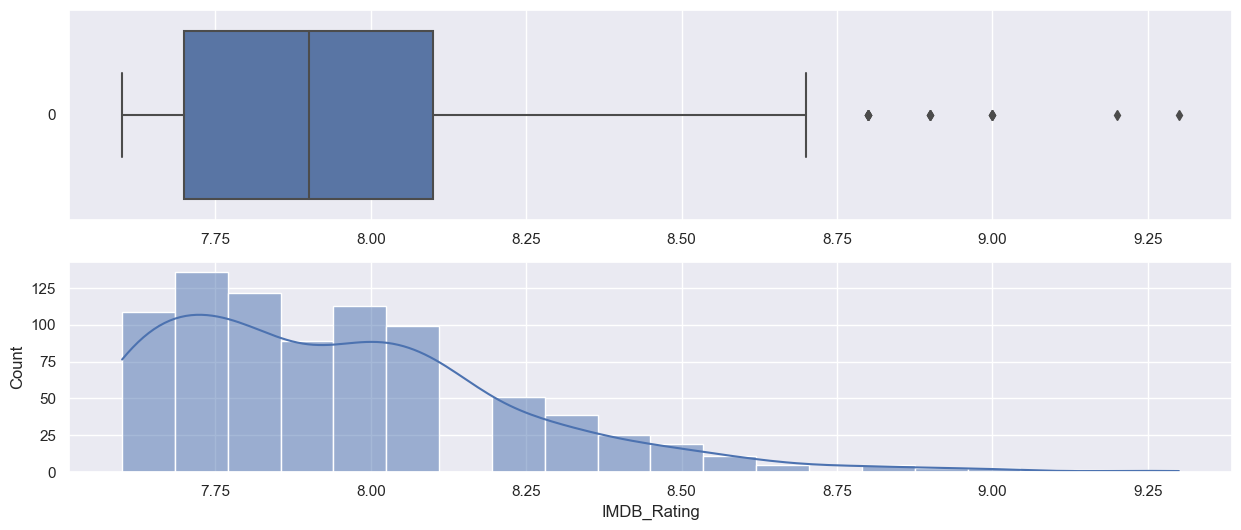

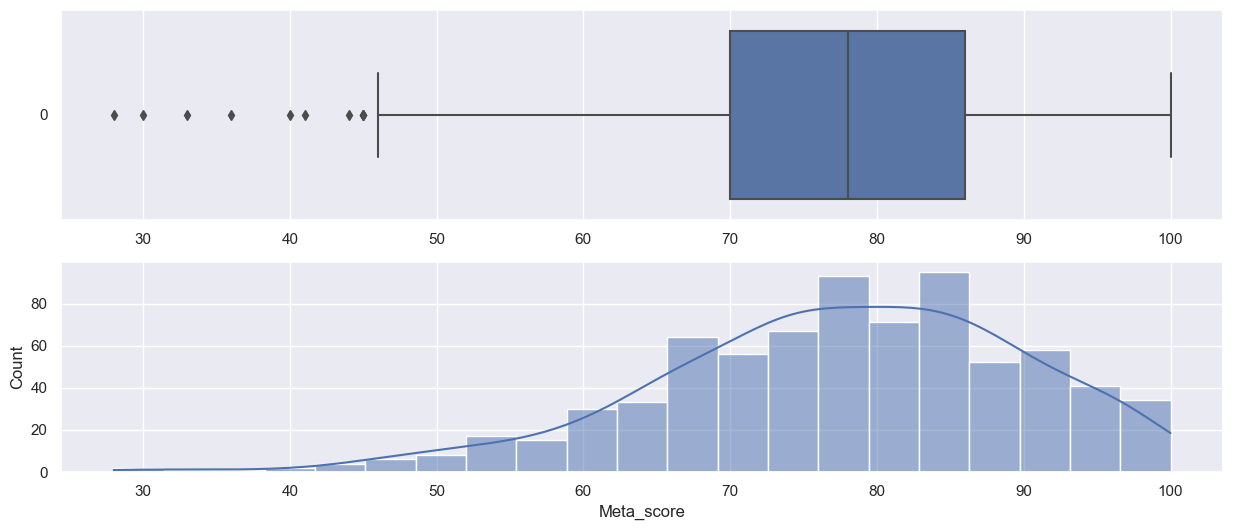

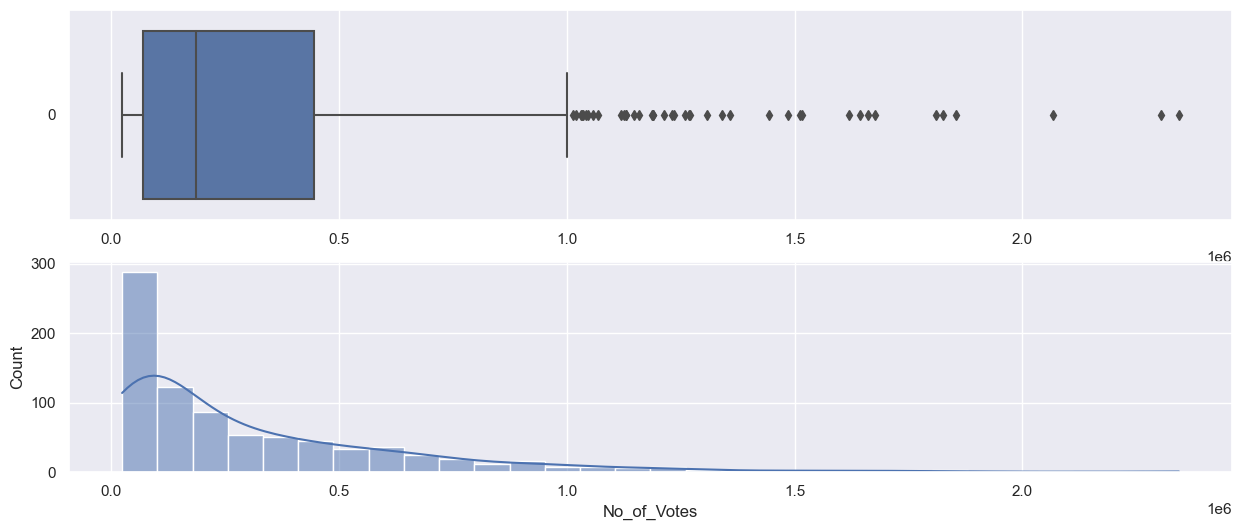

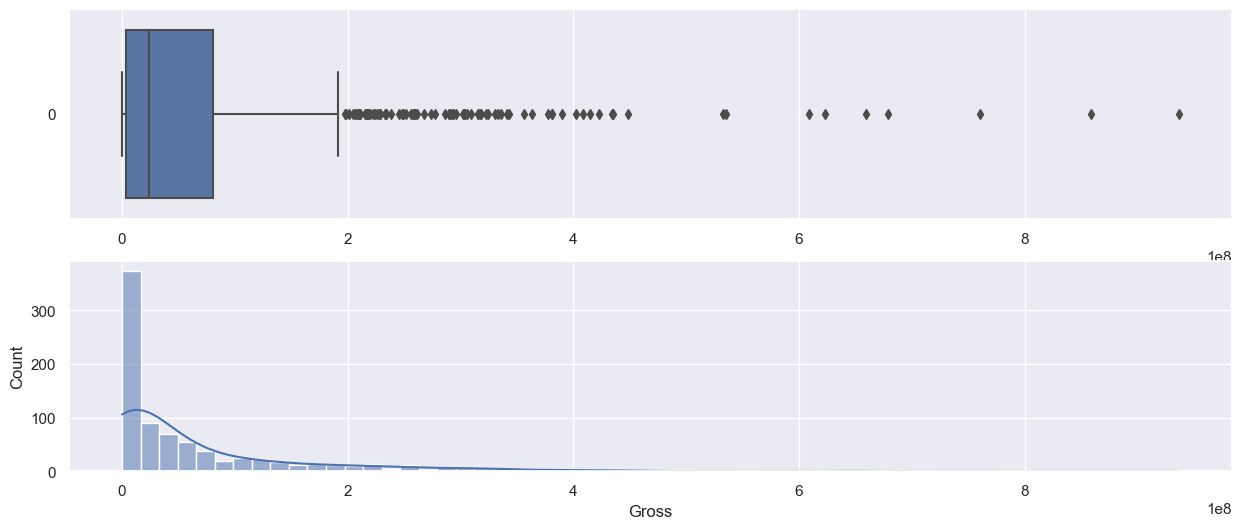

In [11]:
plot=['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
for x in plot:
    fig, ax=plt.subplots(2, 1, figsize=(15, 6))
    sb.boxplot(data=data_clean[x], orient='h', ax=ax[0])
    sb.histplot(data=data_clean[x], ax=ax[1], kde=True)
    plt.show()

IMDB Rating, No. of Votes and Gross are all Positive Skew
Metascore is Negative Skew

Now let's see any of the factors correlate to IMDB Rating

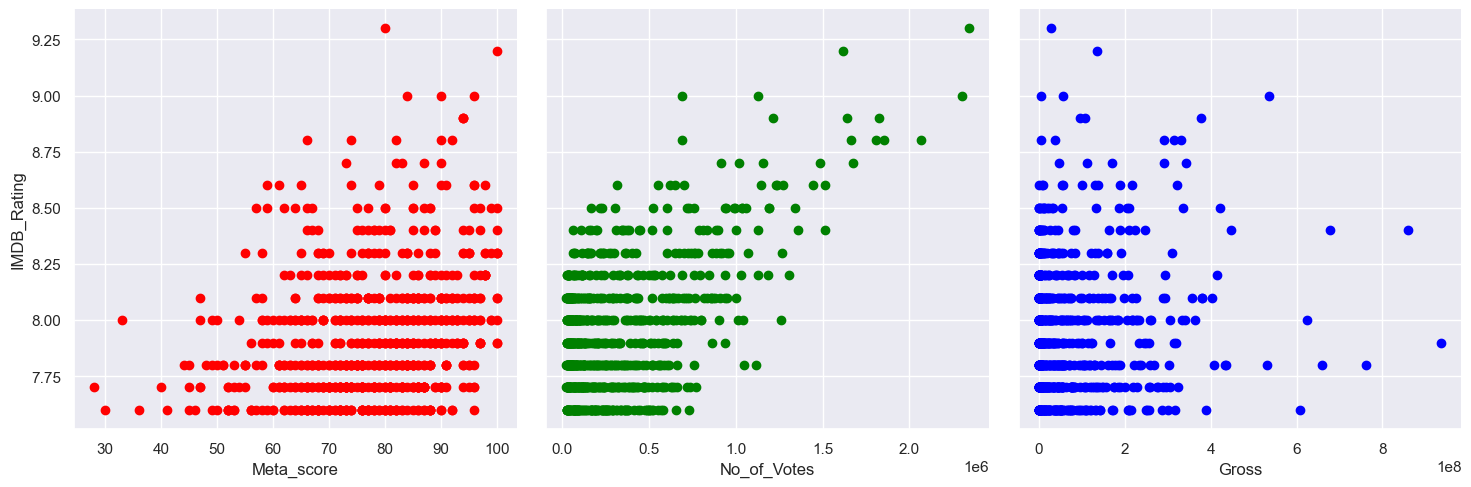

In [12]:
colors = iter(['red', 'green', 'blue', 'purple'])
def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)
sb.PairGrid(data=data_clean[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']],
            x_vars=['Meta_score', 'No_of_Votes', 'Gross'], y_vars=['IMDB_Rating'],
            height=5).map_offdiag(my_scatter)
plt.show()

Metascore seems to have a low positive correlation with IMDB Rating.

No. of Votes seems to have a better positive correlation with IMDB Rating compared to Metascore.

And it appears Gross have no relation to IMDB Rating at all

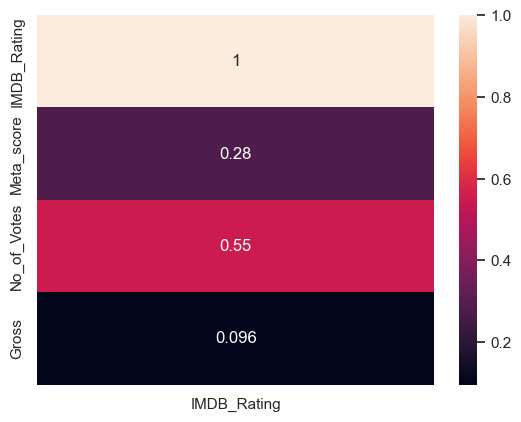

In [13]:
sb.heatmap(data_clean[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']]
           .corr()[['IMDB_Rating']], annot = True).set
plt.show()

It seems that the heatmap matrix supports our observation. We will be performing multi-variate regression with No_of_Votes and Meta_score.

### Categorical Variables

### Genre
We assume that the first entry in the genre row is the main genre of the repective title

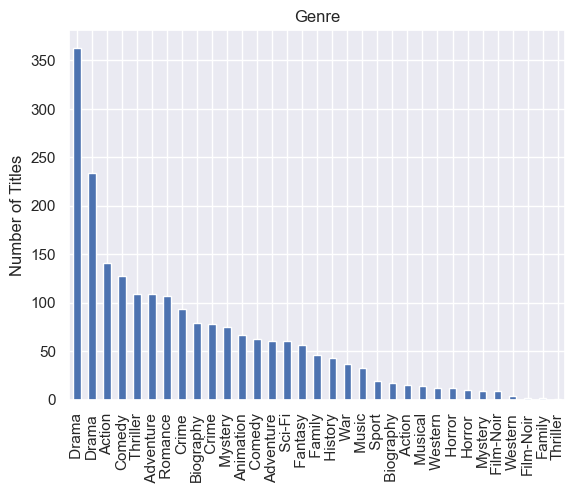

In [14]:
#genr_plt = data_clean['Genre1'].value_counts().plot(kind='bar', title='Main Genre')
#genr_plt.set_ylabel('Number of Titles')
#plt.show()
genr_lst = data_clean['Genre1'].values.tolist() + data_clean['Genre2'].values.tolist() + data_clean['Genre3'].values.tolist()
genr_plt = pd.Series(genr_lst).value_counts().plot(kind='bar', title='Genre')
genr_plt.set_ylabel('Number of Titles')
plt.show()

Base on the bar graph, 'Thriller' and 'Family' are the least frequently occurring genres, while 'Drama' is the most frequently occuring genre.

### Director

We will be seeing the top 25 frequent Directors 

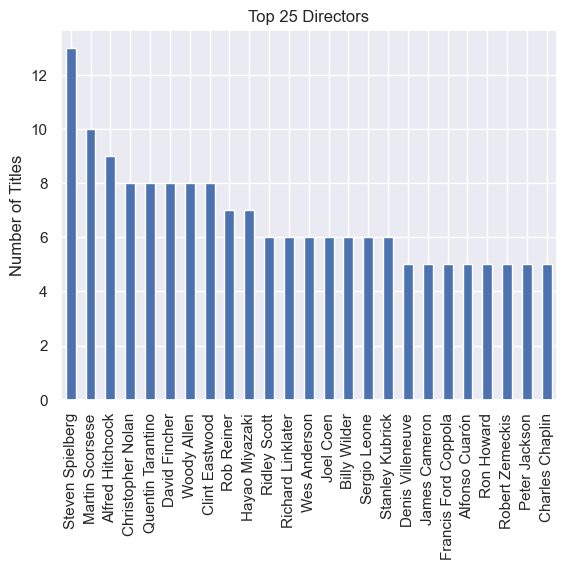

In [15]:
dir_plt = data_clean['Director'].value_counts().head(25).plot(kind='bar', title='Top 25 Directors')
dir_plt.set_ylabel('Number of Titles')
plt.show()

Base on the bar graph, 'Steven Spielberg' has released the most movie in IMDB top 1000.

How about actors?

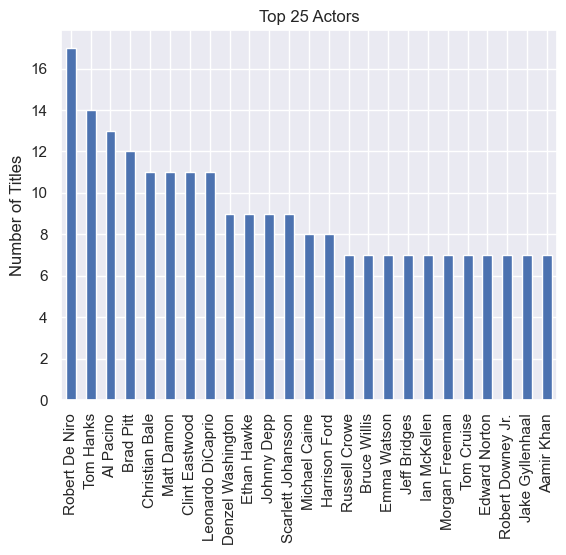

In [16]:
actor_lst = data_clean['Star1'].values.tolist() + data_clean['Star2'].values.tolist() + data_clean['Star3'].values.tolist() + data_clean['Star4'].values.tolist()
actor_plt = pd.Series(actor_lst).value_counts().head(25).plot(kind='bar', title='Top 25 Actors')
actor_plt.set_ylabel('Number of Titles')
plt.show()

Base on the bar graph, 'Robert De Niro' has played the most movie in IMDB top 1000, followed by Tom Hanks then Al Pacino

# Step3: Machine learning

Since what we found in EDA, predictors will be number of votes, gross, meta_scores, genres, actors and directors.
We involves a few numeric variables and a few categories variables, so we will do a numeric model with Linear Regression and a category model with Decision Tree.

## Numeric Model

First we need to do the spliting for train and test data set for the machine learning. Before that we dropm some missing values in the data set for better analysis.

In [17]:
main_data_numeric = data_clean[['IMDB_Rating','No_of_Votes','Gross','Meta_score']]

#Dropping missing values
main_data_numeric = main_data_numeric[~main_data_numeric['Meta_score'].isna()]
main_data_numeric.isna().sum()

numeric_predictors = ['No_of_Votes','Gross','Meta_score']
x = main_data_numeric[numeric_predictors]
y = main_data_numeric[['IMDB_Rating']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (562, 1) (562, 3)
Test Set  : (188, 1) (188, 3)


In [18]:
#To train the model
linreg = LinearRegression()
linreg.fit(x_train,y_train)

#Get the coefficient of the linreg
print("Intercept of Regression: b = ", linreg.intercept_)

#Print the coefficients against the predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))

Intercept of Regression: b =  [7.31440696]
    Predictors  Coefficients
0  No_of_Votes  6.325004e-07
1        Gross -8.068727e-10
2   Meta_score  5.972238e-03


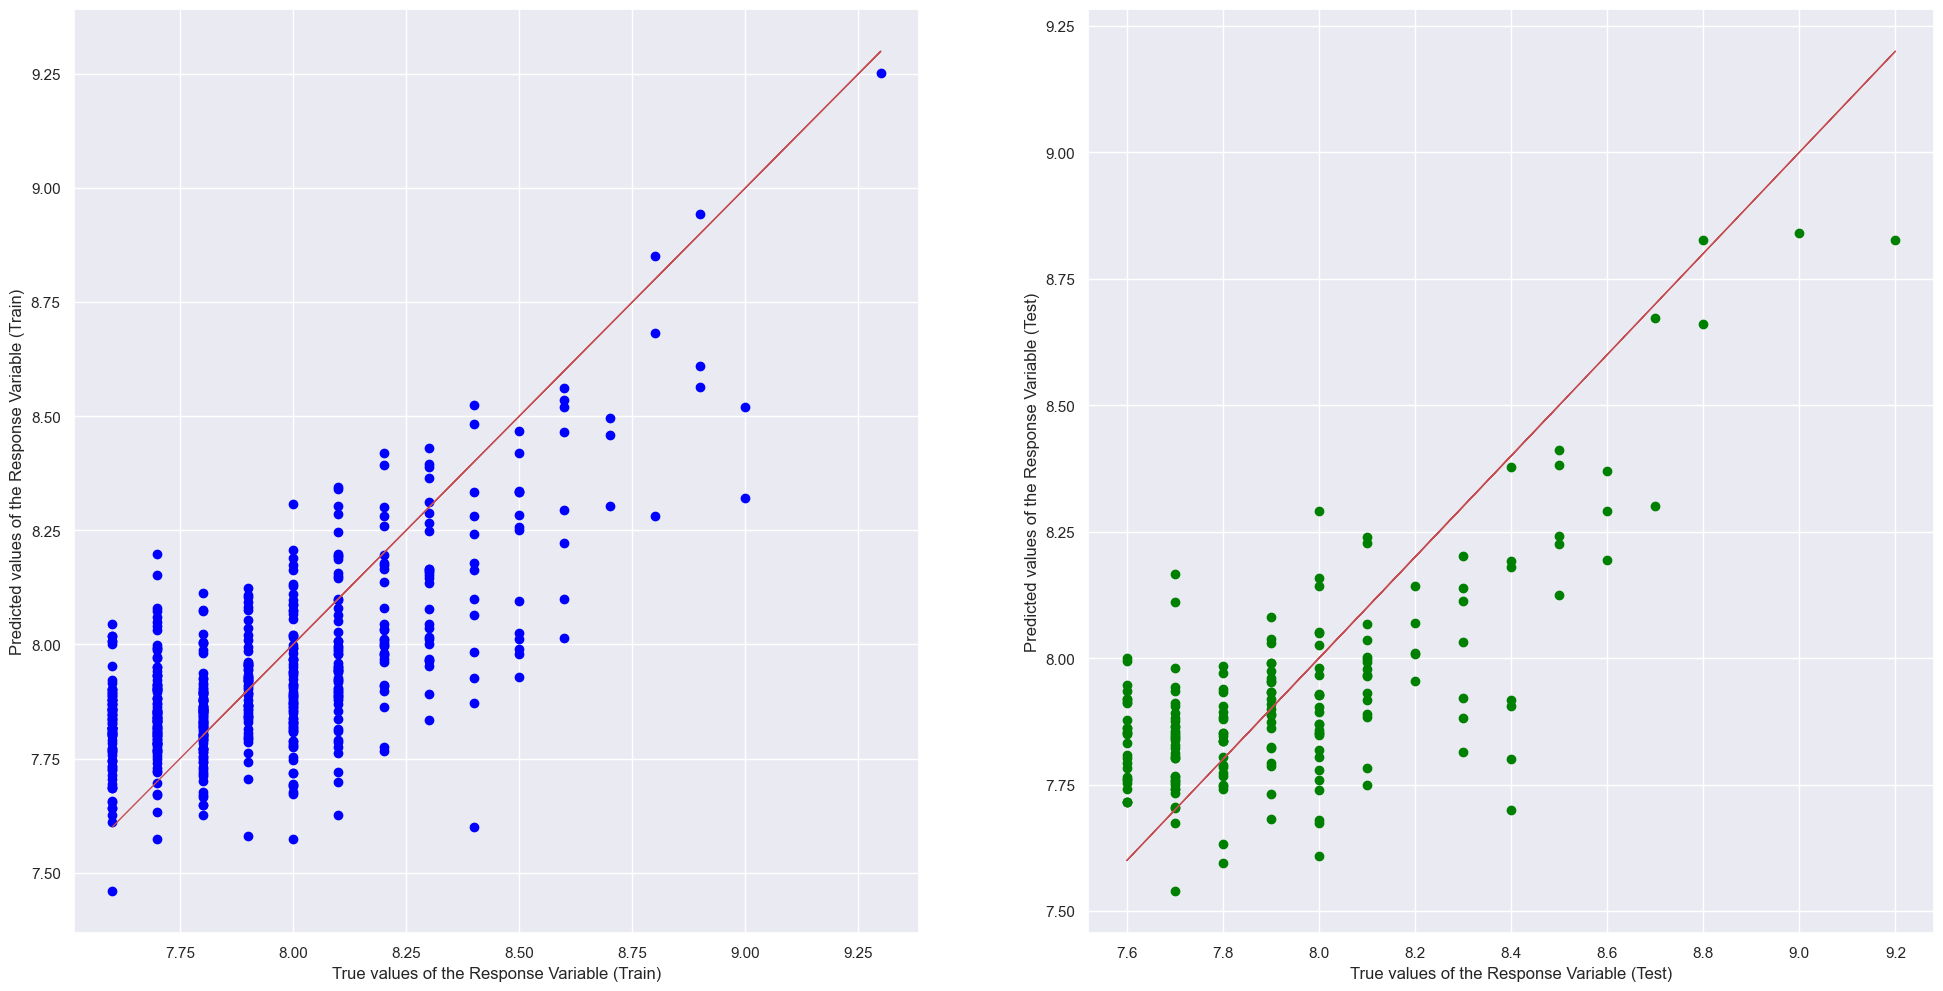

In [19]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Then we need to check the goodness of fit on the train data and the test data.

In [20]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5012114945992348
Mean Squared Error (MSE) 	: 0.04028500002574077
Root Mean Squared Error (RMSE) 	: 0.20071123542477828

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5425384678543205
Mean Squared Error (MSE) 	: 0.04188017355644797
Root Mean Squared Error (RMSE) 	: 0.2046464599167256



Both train set and the test set have similar accuracies. Next we will try to predict the IMDB Rating for some movies based on the numeric predictors.

In [21]:
sample = data_clean.sample(n=15, random_state=0)
sample

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre1,Genre2,Genre3
389,The Iron Giant,1999,PG,86 min,8.0,85.0,Brad Bird,Eli Marienthal,Harry Connick Jr.,Jennifer Aniston,Vin Diesel,172083,23159305,Animation,Action,Adventure
581,Under sandet,2015,R,100 min,7.8,75.0,Martin Zandvliet,Roland Møller,Louis Hofmann,Joel Basman,Mikkel Boe Følsgaard,35539,435266,Drama,History,War
279,Rocky,1976,U,120 min,8.1,70.0,John G. Avildsen,Sylvester Stallone,Talia Shire,Burt Young,Carl Weathers,518546,117235247,Drama,Sport,None
511,The Bourne Identity,2002,UA,119 min,7.9,68.0,Doug Liman,Franka Potente,Matt Damon,Chris Cooper,Clive Owen,508771,121661683,Action,Mystery,Thriller
8,Inception,2010,UA,148 min,8.8,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195,Action,Adventure,Sci-Fi
763,This Is England,2006,NaN,101 min,7.7,86.0,Shane Meadows,Thomas Turgoose,Stephen Graham,Jo Hartley,Andrew Shim,115576,327919,Crime,Drama,None
749,X: First Class,2011,UA,131 min,7.7,65.0,Matthew Vaughn,James McAvoy,Michael Fassbender,Jennifer Lawrence,Kevin Bacon,645512,146408305,Action,Adventure,Sci-Fi
800,Office Space,1999,R,89 min,7.7,68.0,Mike Judge,Ron Livingston,Jennifer Aniston,David Herman,Ajay Naidu,241575,10824921,Comedy,None,None
785,The Magdalene Sisters,2002,R,114 min,7.7,83.0,Peter Mullan,Eileen Walsh,Dorothy Duffy,Nora-Jane Noone,Anne-Marie Duff,25938,4890878,Drama,None,None
890,Bridge of Spies,2015,UA,142 min,7.6,81.0,Steven Spielberg,Tom Hanks,Mark Rylance,Alan Alda,Amy Ryan,287659,72313754,Drama,History,Thriller


In [22]:
# Extract Predictors for Prediction
x_pred = pd.DataFrame(sample[numeric_predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(x_pred)
y_pred

array([[7.91220318],
       [7.78445206],
       [7.9658503 ],
       [7.94415156],
       [8.82768584],
       [7.90085673],
       [7.99275621],
       [7.86458112],
       [7.82256222],
       [7.92175471],
       [7.95698324],
       [7.96157126],
       [8.52552947],
       [7.77748448],
       [7.97820509]])

In [23]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ['Pred_weighted_rating'], index = sample.index)
movie_acc = pd.concat([sample[['Series_Title', 'IMDB_Rating']], y_pred], axis = 1)

y_errs = 100 * abs(movie_acc['IMDB_Rating'] - movie_acc['Pred_weighted_rating']) / movie_acc['IMDB_Rating']
y_errs = pd.DataFrame(y_errs, columns = ["Error(%)"], index = sample.index)
movie_acc = pd.concat([movie_acc, y_errs], axis = 1)

movie_acc

,Series_Title,IMDB_Rating,Pred_weighted_rating,Error(%)
389,The Iron Giant,8.0,7.912203,1.097460
581,Under sandet,7.8,7.784452,0.199333
279,Rocky,8.1,7.965850,1.656169
511,The Bourne Identity,7.9,7.944152,0.558880
8,Inception,8.8,8.827686,0.314612
763,This Is England,7.7,7.900857,2.608529
749,X: First Class,7.7,7.992756,3.802029
800,Office Space,7.7,7.864581,2.137417
785,The Magdalene Sisters,7.7,7.822562,1.591717
890,Bridge of Spies,7.6,7.921755,4.233615


We can see the error for the numeric model is quite small for random samples. But to check the confidence on prediction, we still need to see the Distribution and Deviation of the Errors in prediction.

In [24]:
MSE_train = mean_squared_error(y_train, y_train_pred)
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

Mean Squared Error (MSE) 	: 0.04
Pred Standard Error (SE) 	: 0.2


In [25]:
y_95l = pd.DataFrame(movie_acc['Pred_weighted_rating'] - 1.96*StdE_pred).rename(columns = {'Pred_weighted_rating' : '95 Lower'})
y_95u = pd.DataFrame(movie_acc['Pred_weighted_rating'] + 1.96*StdE_pred).rename(columns = {'Pred_weighted_rating' : '95 Upper'})
y_99l = pd.DataFrame(movie_acc['Pred_weighted_rating'] - 2.58*StdE_pred).rename(columns = {'Pred_weighted_rating' : '99 Lower'})
y_99u = pd.DataFrame(movie_acc['Pred_weighted_rating'] + 2.58*StdE_pred).rename(columns = {'Pred_weighted_rating' : '99 Upper'})

movie_int = pd.concat([movie_acc, y_95l, y_95u, y_99l, y_99u], axis = 1)
movie_int

,Series_Title,IMDB_Rating,Pred_weighted_rating,Error(%),95 Lower,95 Upper,99 Lower,99 Upper
389,The Iron Giant,8.0,7.912203,1.097460,7.518107,8.306299,7.393444,8.430962
581,Under sandet,7.8,7.784452,0.199333,7.390356,8.178548,7.265693,8.303211
279,Rocky,8.1,7.965850,1.656169,7.571754,8.359946,7.447091,8.484609
511,The Bourne Identity,7.9,7.944152,0.558880,7.550056,8.338247,7.425393,8.462910
8,Inception,8.8,8.827686,0.314612,8.433590,9.221782,8.308927,9.346445
763,This Is England,7.7,7.900857,2.608529,7.506761,8.294953,7.382098,8.419616
749,X: First Class,7.7,7.992756,3.802029,7.598660,8.386852,7.473997,8.511515
800,Office Space,7.7,7.864581,2.137417,7.470485,8.258677,7.345822,8.383340
785,The Magdalene Sisters,7.7,7.822562,1.591717,7.428466,8.216658,7.303803,8.341321
890,Bridge of Spies,7.6,7.921755,4.233615,7.527659,8.315851,7.402996,8.440514


In [26]:
print('Average error(%):', movie_int['Error(%)'].sum()/len(movie_int))
print('Highest error(%):', movie_int['Error(%)'].max())
print('99% confidence interval:', 2.58*StdE_pred*2)

Average error(%): 1.7665008014479198
Highest error(%): 4.233614639955974
99% confidence interval: 1.0375177371437132


We can see that the numeric model works well on the data.

## Category model

Now we do the same on category model first to spliting the data into train and test data sets.Since we need to do decision tree, we apply one-hot encoding to the categorical features using the get_dummies function.

In [33]:
main_data_categories = data_clean[['IMDB_Rating','Genre1','Star1','Director']]

#Dropping missing values
main_data_categories = main_data_categories[~main_data_categories['Genre1'].isna()]
main_data_categories.isna().sum()

category_predictors = ['Genre1','Star1','Director']
x = pd.get_dummies(main_data_categories[category_predictors])
y = main_data_categories[['IMDB_Rating']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (623, 1) (623, 1041)
Test Set  : (208, 1) (208, 1041)


Next we do Decision tree and print ONLY the first 4 levels of the tree since the complete tree is too large (but it is necessary to do deeper decision tree to make sure the accuracy is better.

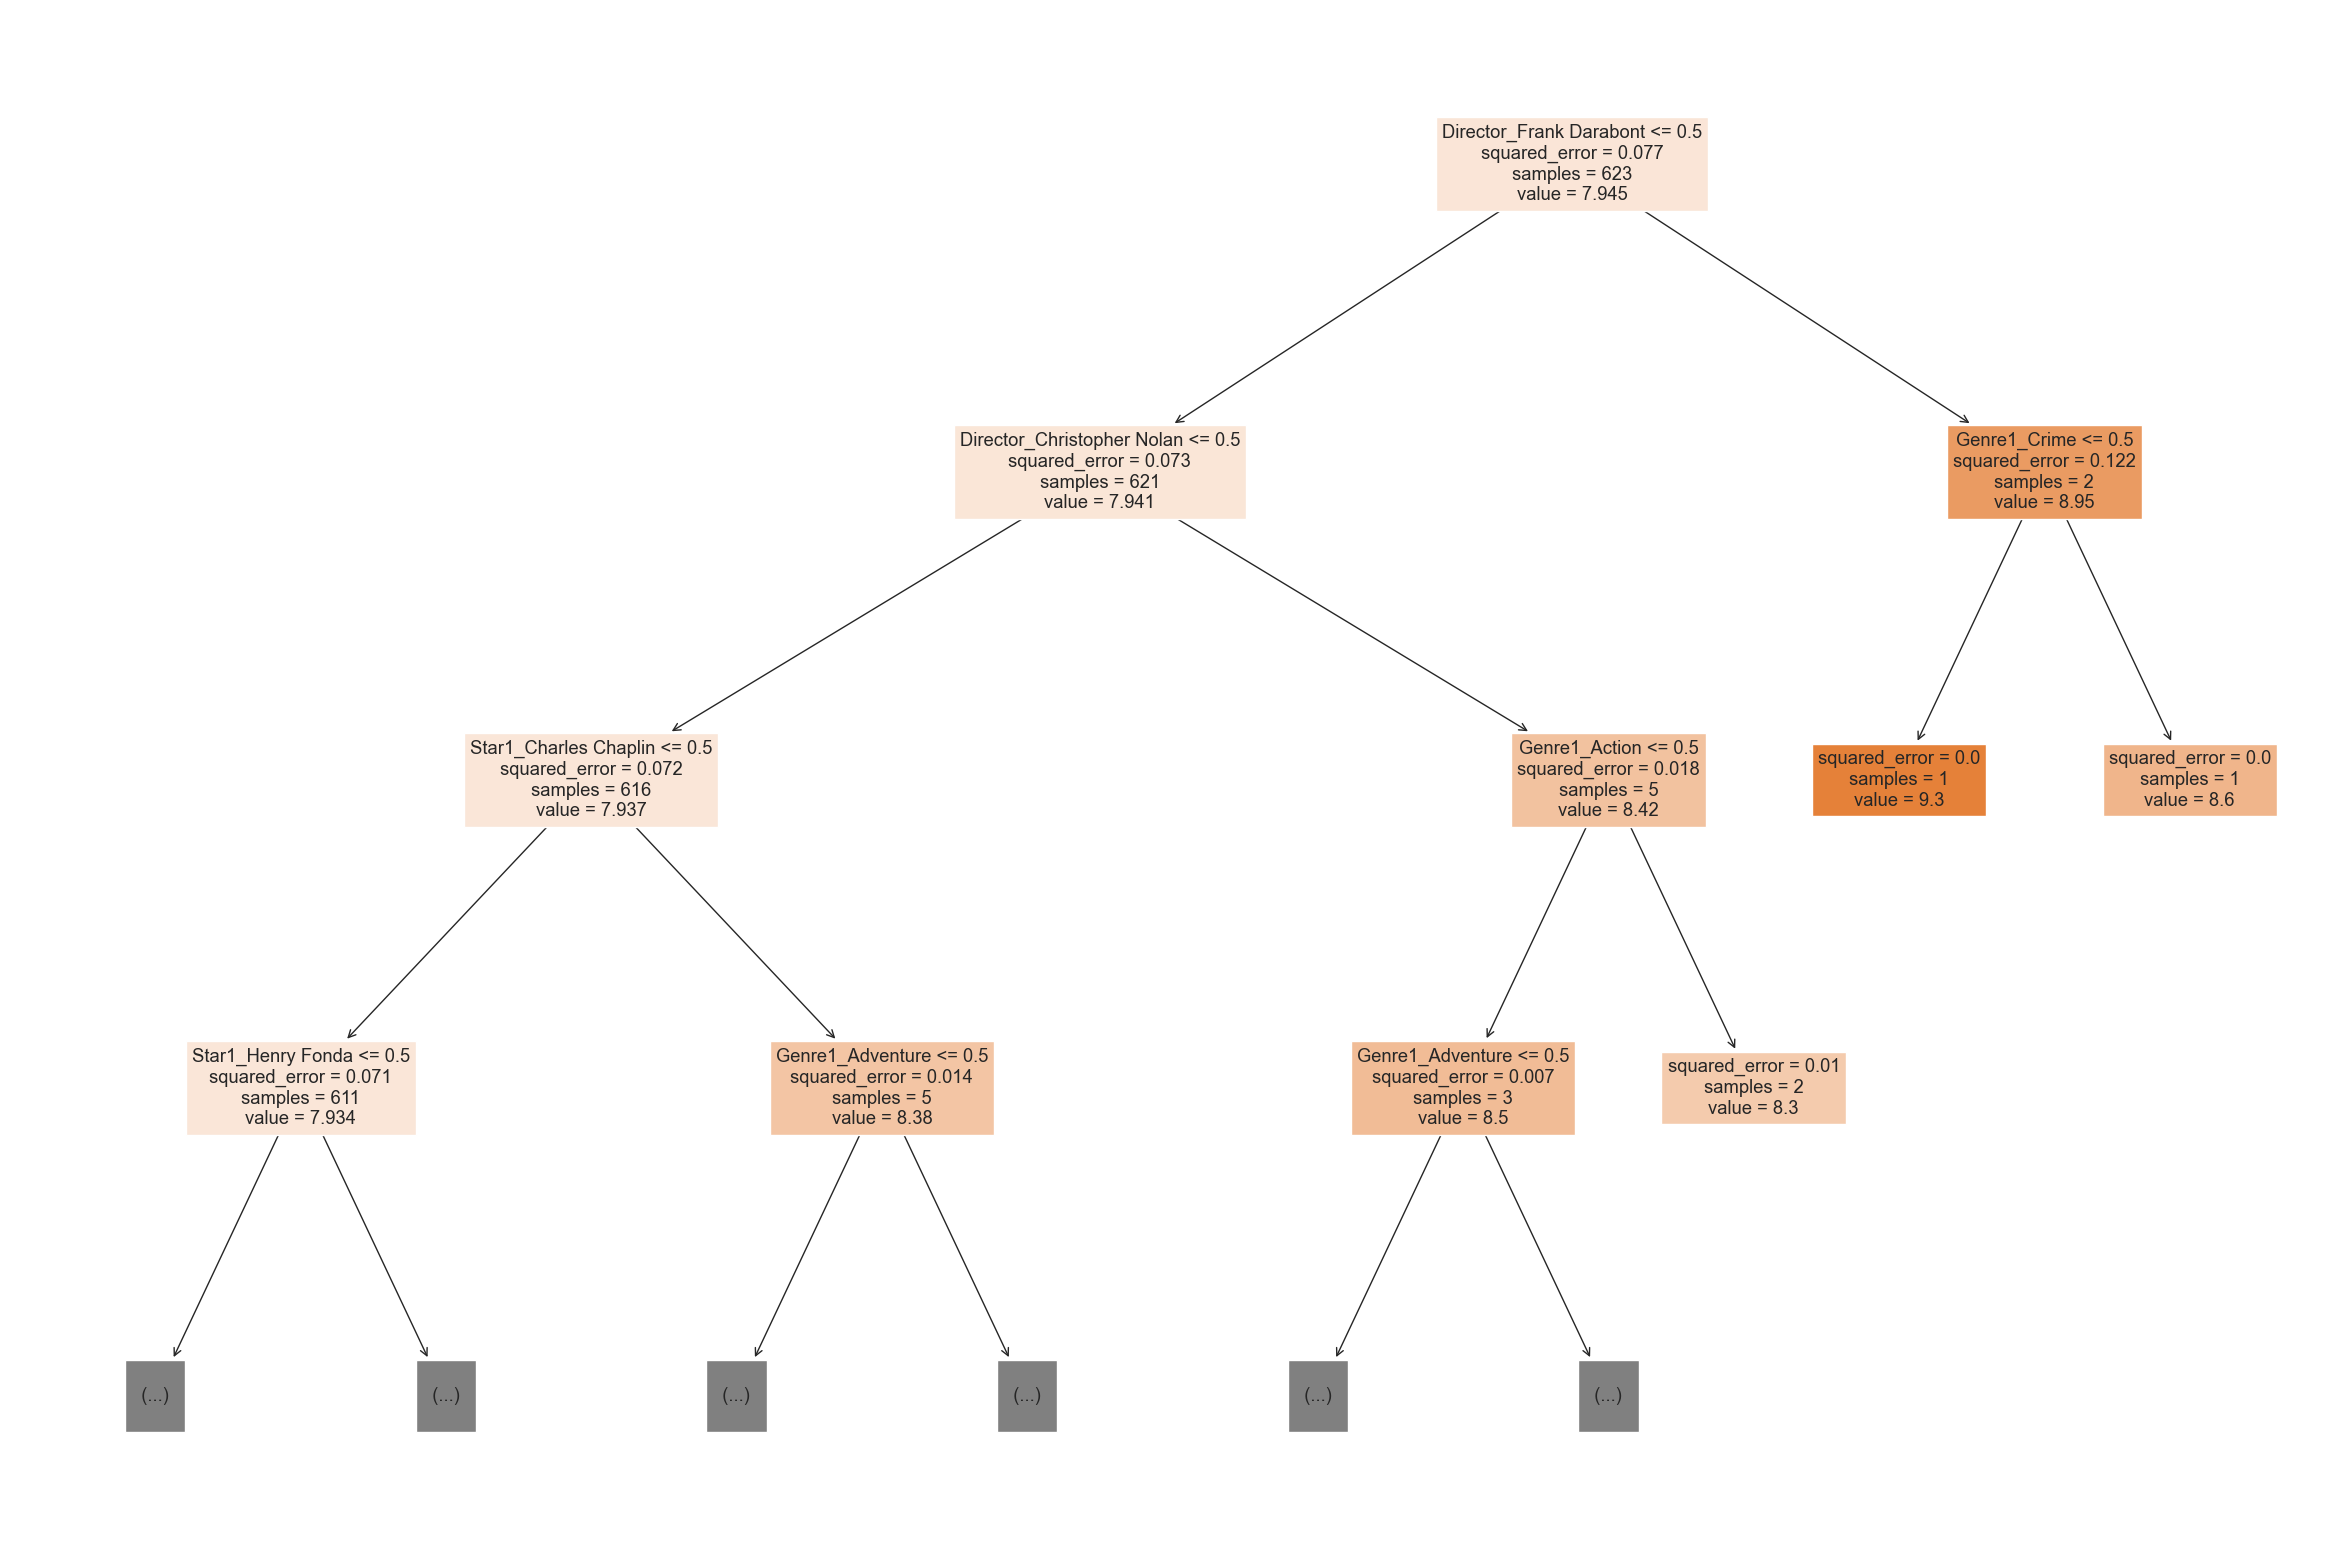

In [45]:
# create a decision tree model
tree = DecisionTreeRegressor()

# train the model on the training set
tree.fit(x_train, y_train)

# plot the decision tree
plt.figure(figsize=(30,20))
plot_tree(tree, feature_names=x_train.columns, filled=True, max_depth=3)
plt.show()

Now we predict the result for the test set and check its accuracy.

In [46]:
# make predictions on the testing set
y_pred = tree.predict(x_test)

# evaluate the model's performance on the testing set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error :", rmse)

Root Mean Squared Error : 0.3496907974856561


It seems like the numerical model with the variables No of Votes, Gross, Meta_score has lower MSE than the categories model with variables Genre, Actor and director. So the numerical model is better to use to predict if a movie is successful or not.